In [140]:
import cv2

In [141]:
import matplotlib.pyplot as plt

In [142]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [143]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [144]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    

In [145]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [146]:
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000027D2D0FDB30>

In [147]:
img = cv2.imread('pic.jpg')

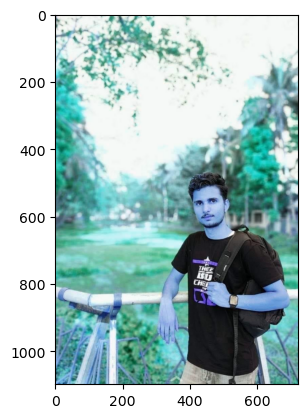

In [148]:
plt.imshow(img)

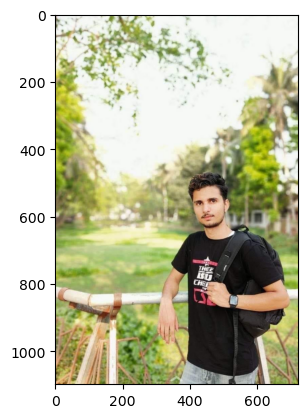

In [149]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [150]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)

In [151]:
print(ClassIndex)

[1]


In [152]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+0, boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

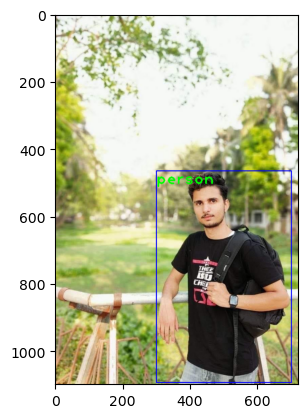

In [153]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))